<a href="https://colab.research.google.com/github/bs3537/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/Completed_Bhavneesh_Intro_to_NN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
### Hidden Layer:
### Output Layer:
### Neuron:
### Weight:
### Activation Function:
### Node Map:
### Perceptron:


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

Neural networks basics:

Input Layer: The initial data for the neural network ?(from a dataframe, array, a csv file or web network) is processed by this layer. Each layer has a number of units or nodes. Traditionally, no. of neurons in input layer = no. of training data features + 1. The input layer receives the data. Each input has an associated weight that is assigned based on its relative importance to other inputs. The extra node is the calculate the bias term. The bias (offset) makes sure that even when all the inputs are none (all 0s, there is going to be an activation in the neuron). The bias in coordination with weights gives the NN the full range of motion it needs to find the best fit to the data. 

Hidden Layer: The neurons in the hidden layer calculate the weighted sum of inputs and weights, add the bias and execute an activation function before passing the ouput to the next layer. Usually, each hidden layer has same number of neurons. The optimal no. of neurons in hidden layer = (Trading data sample)/(Factor*(Input neurons+Output neurons)). The factor is used to prevent over-fitting and is usually between 1-10. One hidden layer is usually sufficient for the majority of problems. 

Output Layer: The output or the final layer receives the input from the hidden layers. The number of nodes in the output layer is one (for both regression and classification problems). If we use the probabilistic function like softmax, then the output layer has one node per class label in the model.

Neuron and weight: It is the basic unit of a neural network. It gets a certain number of inputs and a bias value. When a singal (value) arrives, it gets multiplied by a weight value. If a neuron has 4 inputs, it has 4 weight values, which can be adjusted during training time. Each connection between the neurons in different layers is called a synapse and has a weight value associated with it. The goal of the training is to update the weight value to decrease the loss (error).

Activation function: Activation functions are used to introduce non-linearity to neural networks. It squashes the values in a smaller range, e.g. sigmid function squashes the values between a range of 0 to 1. Activation functions like ReLU, LeakyReLU, SeLU are preferred over sigmid activation function.

Node Map: It is a visual representation of the architecture the neural network. It is like a flowchart showing the path from inputs to outputs. 

Perceptron: It is the simplest and oldest model of Neuron. It takes some inputs, adds them up, applies the activation function and passes them to the output layer. A feed forward neural network has interconnections between the neurons of the successive layers. There is a layer between the input and the ouput layers called a hidden layer. The activation flows from the input layer to the output, without back loops. Deep feed forward neural networks have more than one hidden layer.

The flow of information through a neural network from inputs to outputs, including: inputs, weights, bias, and activation functions:

If the input layer has two values x1 and x2 and the synpases to the output layer have weights w1 and w2 respectively, and bias is b, the input recieved by is
y = sigmoid(x1w1 + x2w2 + b) if applying sigmoid activation function.  


In [0]:
#Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate.

In [0]:
import pandas as pd
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [0]:
df.head()

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [0]:
target = 'y'

X_features = df.drop(columns = [target])

numeric_features = X_features.select_dtypes(include='number').columns.tolist()



In [0]:
X = df[numeric_features]

In [0]:
X = np.array(X)

In [0]:
X

array([[0, 0],
       [1, 0],
       [0, 1],
       [1, 1]])

In [0]:
y = df[target]


In [0]:
#Coding y as 1 and -1 is mandatory for using Perceptron

y=np.array([1 if i==1 else -1 for i in y])

In [0]:
y

array([ 1,  1,  1, -1])

In [0]:
#Fit Perceptron on X and y and plot the result

In [0]:
class Perceptron(object):
    
    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter
        
    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # weights
        self.weight = np.zeros(1 + X.shape[1])

        # Number of misclassifications
        self.errors = []  # Number of misclassifications

        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                delta_w = self.rate * (target - self.predict(xi))
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """Return class label after unit step"""
        """ Default Step Function"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

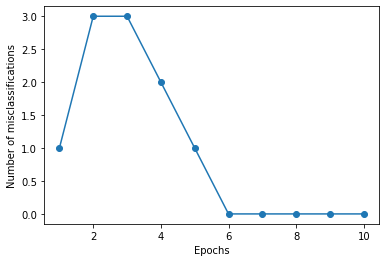

In [0]:

pn = Perceptron(0.1, 10)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [0]:
#Diabetes dataset

In [0]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [0]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [0]:
diabetes.shape

(768, 9)

In [0]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [0]:
#Prepare X and y vectors

In [0]:
target = 'Outcome'

X_features = diabetes.drop(columns = [target])

numeric_features = X_features.select_dtypes(include='number').columns.tolist()


# Get a series with the cardinality of the nonnumeric features
cardinality = X_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features


In [0]:
#X vector

X = diabetes[features]


In [0]:
#y vector

y = diabetes[target]

In [0]:
#Coding y as 1 and -1 is mandatory for using Perceptron

y=np.array([1 if i==1 else -1 for i in y])

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

In [0]:
X = scaler.fit_transform(X)

In [0]:
#Perceptron Class

class Perceptron(object):
    
    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter
        
    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # weights
        self.weight = np.zeros(1 + X.shape[1])

        # Number of misclassifications
        self.errors = []  # Number of misclassifications

        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                delta_w = self.rate * (target - self.predict(xi))
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weight[1:]) + self.weight[0]
    
    #Can apply stochastic gradient descent function here
    
    

    def predict(self, X):
        """Return class label after unit step"""
        """ Default Step Function"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

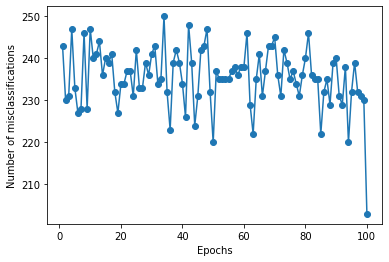

In [0]:
#Fit perceptron on X and y
pn = Perceptron(0.01, 100)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [0]:
#Keras implementation

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

In [0]:
model=Sequential()
model.add(Dense(16, activation='relu', input_dim=X.shape[1]))
model.add(Dropout(0.2)) 
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['binary_accuracy'])

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                144       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [0]:
y = np.array(diabetes[target])

In [0]:
history = model.fit(X, y, epochs=100, verbose=True, batch_size=10)

Train on 768 samples
Epoch 1/100
768/768 [==============================] - 0s 532us/sample - loss: 0.7948 - binary_accuracy: 0.4466
Epoch 2/100
768/768 [==============================] - 0s 113us/sample - loss: 0.6932 - binary_accuracy: 0.6146
Epoch 3/100
768/768 [==============================] - 0s 124us/sample - loss: 0.6224 - binary_accuracy: 0.6536
Epoch 4/100
768/768 [==============================] - 0s 116us/sample - loss: 0.5745 - binary_accuracy: 0.6979
Epoch 5/100
768/768 [==============================] - 0s 122us/sample - loss: 0.5619 - binary_accuracy: 0.7188
Epoch 6/100
768/768 [==============================] - 0s 107us/sample - loss: 0.5336 - binary_accuracy: 0.7396
Epoch 7/100
768/768 [==============================] - 0s 122us/sample - loss: 0.5200 - binary_accuracy: 0.7370
Epoch 8/100
768/768 [==============================] - 0s 124us/sample - loss: 0.5031 - binary_accuracy: 0.7461
Epoch 9/100
768/768 [==============================] - 0s 113us/sample - loss: 0.49

In [0]:
#The classification accuracy is 80% by epoch 95. 

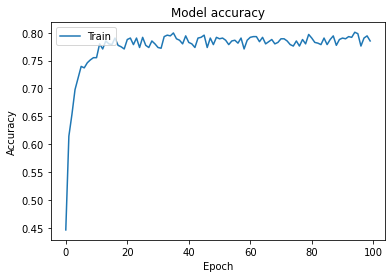

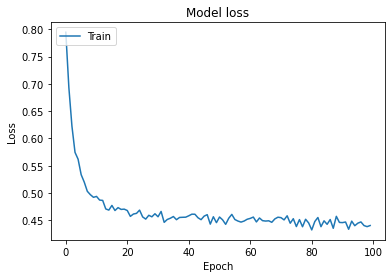

In [0]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history.history['binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?